# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

> GENERAL

|            |vanilla|chocolate|row total|
|------------|-------|---------|---------|
|bowl 1      |30     |10       |40       |
|bowl 2      |20     |20       |40       |
|column total|50     |30       |80       |


> TOTAL WISE

|            |vanilla|chocolate|row total|
|------------|-------|---------|---------|
|bowl 1      |37.5%  |12.5%    |50%      |
|bowl 2      |25%    |25%      |50%      |
|column total|62.5%  |37.5%    |100%     |


> ROW WISE

|            |vanilla|chocolate|row total|
|------------|-------|---------|---------|
|bowl 1      |75%    |25%      |100%     |
|bowl 2      |50%    |50%      |100%     |
|column total|50     |30       |80       |


> COLUMN WISE

|            |vanilla|chocolate|row total|
|------------|-------|---------|---------|
|bowl 1      |60%    |33%      |40       |
|bowl 2      |40%    |67%      |40       |
|column total|100%   |100%     |80       |

In [34]:
# defining the probabilities
p_b1 = 0.5
p_b2 = 0.5
p_vb1 = 0.75
p_vb2 = 0.5

# calculating P(V)
pVanilla = p_b1 * p_vb1 + p_b2 * p_vb2

# using Bayes' theorem to calculate P(B1|V)
p_b1_Vanilla = (p_vb1 * p_b1) / pVanilla
print(f"Probability of vanilla cookie coming from Bowl 1 = {p_b1_Vanilla*100}%")

Probability of vanilla cookie coming from Bowl 1 = 60.0%


What is the probability that it came from Bowl 2?

In [35]:
p_b2_Vanilla = (p_vb2 * p_b2) / pVanilla
print(f"Probability of vanilla cookie coming from Bowl 2 = {p_b2_Vanilla*100}%")

Probability of vanilla cookie coming from Bowl 2 = 40.0%


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [33]:
# defining the probabilities
p_b1 = 0.5
p_b2 = 0.5
p_cb1 = 0.25
p_cb2 = 0.5

# calculating P(C)
pChocolate = (p_b1 * p_cb1) + (p_b2 * p_cb2)

# bowl 1
p_b1_Chocolate = (p_cb1 * p_b1) / pChocolate
print(f"Probability of chocolate cookie coming from Bowl 1 = {round(p_b1_Chocolate*100)}%")

# bowl 2
p_b2_Chocolate = (p_cb2 * p_b2) / pChocolate
print(f"Probability of chocolate cookie coming from Bowl 2 = {round(p_b2_Chocolate*100)}%")

Probability of chocolate cookie coming from Bowl 1 = 33%
Probability of chocolate cookie coming from Bowl 2 = 67%


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

> GENERAL

|            |bag 1|bag 2|row total|
|------------|-----|-----|---------|
|brown       |30%  |13%  |43%      |
|yellow      |20%  |14%  |34%      |
|red         |20%  |13%  |33%      |
|green       |10%  |20%  |30%      |
|orange      |10%  |16%  |26%      |
|tan         |10%  |0%   |10%      |
|blue        |0%   |24%  |24%      |
|column total|100% |100% |200%     |

In [59]:
# defining the dictionaries
bag1 = {"Brown": 0.3, "Yellow": 0.2, "Red": 0.2, "Green": 0.1, "Orange": 0.1, "Tan": 0.1}
bag2 = {"Blue": 0.24, "Green": 0.2, "Orange": 0.16, "Yellow": 0.14, "Red": 0.13, "Brown": 0.13}

# converting dictionaries to dataframes
bag1 = pd.DataFrame(list(bag1.items()), columns=["Color", "Bag1"])
bag2 = pd.DataFrame(list(bag2.items()), columns=["Color", "Bag2"])

# merging the dataframes
candy = pd.merge(bag1, bag2, on="Color", how="outer")

# filling NaN values with 0
candy.fillna(0, inplace=True)

# show
candy

,Color,Bag1,Bag2
0,Brown,0.3,0.13
1,Yellow,0.2,0.14
2,Red,0.2,0.13
3,Green,0.1,0.20
4,Orange,0.1,0.16
5,Tan,0.1,0.00
6,Blue,0.0,0.24


In [52]:
# defining the probabilities
p_b1 = 0.5
p_b2 = 0.5

p_yb1 = candy[candy["Color"] == "Yellow"]["Bag1"].values[0]
p_yb2 = candy[candy["Color"] == "Yellow"]["Bag2"].values[0]

p_gb1 = candy[candy["Color"] == "Green"]["Bag1"].values[0]
p_gb2 = candy[candy["Color"] == "Green"]["Bag2"].values[0]

# calculating P(Yellow and Green)
p_YellowGreen = p_b1 * p_yb1 * p_b2 * p_gb2 + p_b2 * p_yb2 * p_b1 * p_gb1

# using Bayes" theorem to calculate P(Bag1|Yellow)
p_b1_Yellow = (p_yb1 * p_gb2 * p_b1 * p_b2) / p_YellowGreen
print(f"Probability of yellow candy coming from Bag 1 = {round(p_b1_Yellow*100)}%")

Probability of yellow candy coming from Bag 1 = 74%


What is the probability that the yellow candy came from Bag 2?

In [53]:
# using Bayes' theorem to calculate P(Bag2|Yellow)
p_b2_Yellow = (p_yb2 * p_gb1 * p_b2 * p_b1) / p_YellowGreen
print(f"Probability of yellow candy coming from Bag 2 = {round(p_b2_Yellow*100)}%")

Probability of yellow candy coming from Bag 2 = 26%


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [54]:
# using Bayes' theorem to calculate P(Bag1|Green)
p_b1_Green = (p_gb1 * p_yb2 * p_b1 * p_b2) / p_YellowGreen
print(f"Probability of green candy coming from Bag 1 = {round(p_b1_Green*100)}%")

# using Bayes' theorem to calculate P(Bag2|Green)
p_b2_Green = (p_gb2 * p_yb1 * p_b1 * p_b2) / p_YellowGreen
print(f"Probability of green candy coming from Bag 2 = {round(p_b2_Green*100)}%")

Probability of green candy coming from Bag 1 = 26%
Probability of green candy coming from Bag 2 = 74%


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [63]:
# defining the probabilities
pA = 1/3
pC = 2/3

print(f"The probability of winning if you stick with Door A is {round(pA * 100)}%")
print(f"The probability of winning if you switch to Door C is {round(pC * 100)}%")

The probability of winning if you stick with Door A is 33%
The probability of winning if you switch to Door C is 67%


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

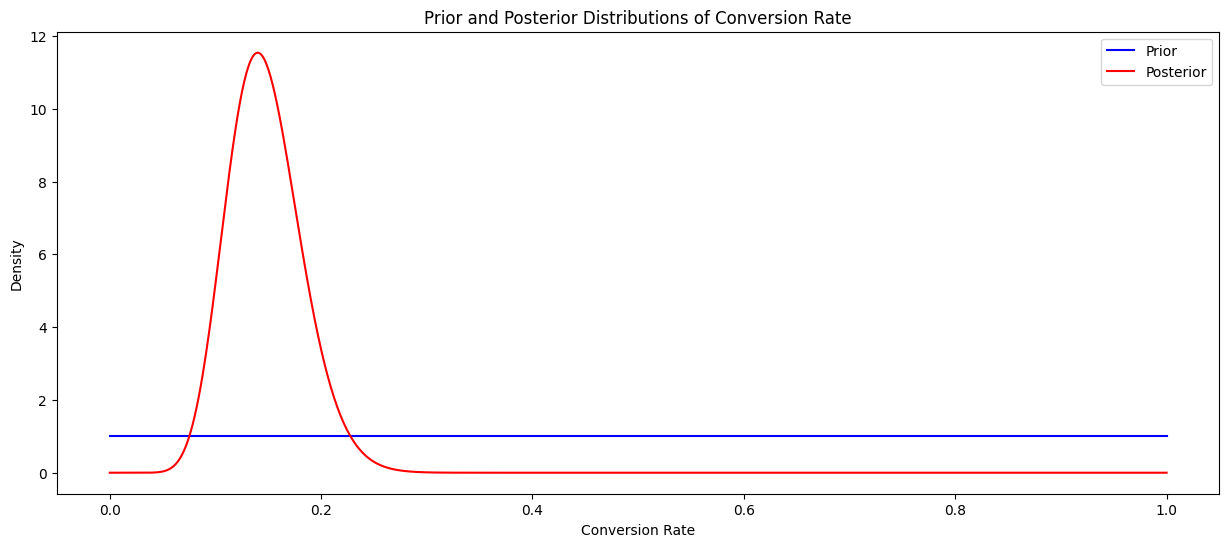

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# observed data
visitors = 100
signups = 14

# parameters for the prior distribution
alpha_prior = 1
beta_prior = 1

# parameters for the posterior distribution
alpha_posterior = alpha_prior + signups
beta_posterior = beta_prior + visitors - signups

# create a range of possible conversion rates
rates = np.linspace(0, 1, 1000)

# compute the probability density function (pdf) of the prior and posterior distributions
prior_pdf = beta.pdf(rates, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(rates, alpha_posterior, beta_posterior)

# plot the prior and posterior distributions
plt.figure(figsize=(15, 6))
plt.plot(rates, prior_pdf, label="Prior", color="blue")
plt.plot(rates, posterior_pdf, label="Posterior", color="red")
plt.title("Prior and Posterior Distributions of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [66]:
# create a random variable for the posterior distribution
posterior = beta(alpha_posterior, beta_posterior)

# calculate descriptive statistics
mean = round(posterior.mean(), 2)
variance = round(posterior.var(), 2)
std_dev = round(posterior.std(), 2)
median = round(posterior.median(), 2)
mode = (alpha_posterior - 1) / (alpha_posterior + beta_posterior - 2)  # mode for a Beta distribution

# print the statistics
print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Median:", median)
print("Mode:", mode)

Mean: 0.15
Variance: 0.0
Standard Deviation: 0.03
Median: 0.14
Mode: 0.14


What is the 90% credible interval range?

The credible interval, also known as the **highest posterior density interval** (HPDI), is an interval estimate of a parameter that is plausible given the data and a particular level of confidence. A 90% credible interval is the range within which the true parameter value lies with 90% probability.

In Python, we can use the **ppf** (percent point function) method of the posterior distribution to calculate the lower and upper bounds of the credible interval.

This code calculates the **5th** and **95th percentiles** of the posterior distribution, which define the **lower** and **upper bounds** of the ***90% credible interval***. The **ppf method** returns the value of the parameter for which the **cumulative distribution function** (CDF) is equal to a given probability.

> For example, posterior.ppf(0.05) returns the value of the conversion rate for which 5% of the distribution's probability mass lies to the left.

Note that the **90% credible interval** is ***not the same*** as the **90% confidence interval** from ***frequentist statistics***.

While they both provide a range of plausible values for a parameter, they are interpreted differently:
- a **90% confidence interval** means that if you were to repeat the experiment many times, 90% of the confidence intervals would contain the true parameter value
- whereas a **90% credible interval** means that given the observed data, there is a 90% probability that the true parameter value lies within the interval

In [67]:
# calculate the 90% credible interval
lower_bound = posterior.ppf(0.05)  # 5th percentile
upper_bound = posterior.ppf(0.95)  # 95th percentile

print(f"90% credible interval: {(lower_bound, upper_bound)}")

90% credible interval: (0.09383120735394776, 0.20817889490003688)


The 90% credible interval (0.094, 0.208) gives us a range of plausible values for the conversion rate of the ad, given the data we observed. 

In simpler terms, based on the data of 100 visitors and 14 sign-ups, we can say with 90% confidence that the true conversion rate (i.e., the probability that a visitor to the site will sign up for landscaping services) is between approximately 9.4% and 20.8%. 

This is a useful range as it tells us what we might expect if we continue to run the ad. For example, if we have 100 new visitors to the site, we might expect between about 9 and 21 of them to sign up for the services, based on the current data.

What is the Maximum Likelihood Estimate?

The **Maximum Likelihood Estimate** (MLE) is a method of estimating the parameters of a statistical model. It finds the parameter values that maximize the likelihood function, given the observed data.

In the context of the conversion rate problem, the MLE of the conversion rate would be the proportion of visitors who signed up for landscaping services, which is 14 out of 100 or 0.14.

It's important to note that the MLE is a point estimate, meaning it gives a single value as the "best" estimate of the conversion rate. On the other hand, the Bayesian approach gives a posterior distribution, which represents a range of plausible values for the conversion rate, along with the relative probabilities of these values.

The peak of this distribution (the mode) corresponds to the maximum a posteriori (MAP) estimate, which is the most likely value of the conversion rate, given the observed data and the prior distribution.

For a Beta distribution, the MAP is `(alpha - 1) / (alpha + beta - 2)`, assuming alpha and beta are both greater than 1.

In [68]:
# calculate the MLE
mle = signups / visitors
print("Maximum Likelihood Estimate:", mle)

# outputs the MLE of the conversion rate.

Maximum Likelihood Estimate: 0.14
